## What is Curse of Dimensionality? Explain

Dimensionality in a dataset becomes a severe impediment to achieve a reasonable efficiency for most algorithms. Increasing the number of features does not always improve accuracy. When data does not have enough features, the model is likely to underfit, and when data has too many features, it is likely to overfit. Hence it is called the curse of dimensionality. The curse of dimensionality is an astonishing paradox for data scientists, based on the exploding amount of n-dimensional spaces — as the number of dimensions, n, increases.



**Sparseness**: 
*   Points in an n-dimensional space frequently become sparse as the number of dimensions grows.
*   The distance between points will extend to grow as the number of dimensions increases




**Implications of the Curse of Dimensionality**:
*   Optimization problems will be infeasible as the number of features increases.
*   Due to the absolute scale of inherent points in an n-dimensional space, as n maintains to grow, the possibility of recognizing a particular point (or even a nearby point) proceeds to fall.




## What is feature selection? Why is it needed? what are the different approaches of feature selection?

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable. Feature selection is primarily focused on removing non-informative or redundant predictors from the model.

**Goal of Feature Selection:**
The goal of feature selection in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

**Methods for feature selection:**


*   Filter Methods: 
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

*   Wrapper Methods: 
Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.



*   Embedded Methods: 
These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.






In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')


### Reading Iris Dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
len(df)

150

In [ ]:
df['target'].unique()

array([0., 1., 2.])

Hence, the dataset has 150 rows and 3 classes 

Creating a new column to store Species names

In [ ]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Renaming the columns

In [ ]:
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

In [ ]:
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
df.shape

(150, 6)

### Defining Target and Response variables

In [ ]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

### Fitting the model

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

### Model Evaluation

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print(np.mean(scores))

0.9800000000000001


### Model Prediction on new data

In [ ]:
new = [5, 3, 1, 0.4]
model.predict([new])

array(['setosa'], dtype='<U10')

### Visualize LDA data

In [ ]:
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
X_r2 = model.fit(X, y).transform(X)
target_names = iris.target_names

Transformed X array

In [ ]:
X_r2[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

LDA Plot

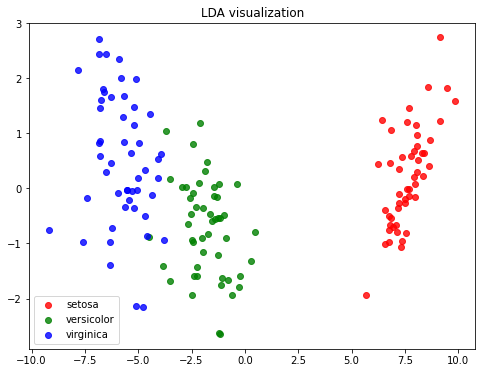

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
_ = plt.legend(loc='best', shadow=False, scatterpoints=1)
_ = plt.title('LDA visualization')